In [3]:
import warnings
warnings.filterwarnings('ignore', category= Warning)
import pandas as pd
import math
from sklearn.model_selection import train_test_split,KFold
import numpy as np
import os

In [4]:
os.chdir("D://Edvancer//Python//$$___Python - Project--3___$$")

In [5]:
cf_train = pd.read_csv("counterfeit_train.csv")
cf_test = pd.read_csv("counterfeit_test.csv")

In [6]:
cf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
Medicine_ID            6818 non-null object
Counterfeit_Weight     5652 non-null float64
DistArea_ID            6818 non-null object
Active_Since           6818 non-null int64
Medicine_MRP           6818 non-null float64
Medicine_Type          6818 non-null object
SidEffect_Level        6818 non-null object
Availability_rating    6818 non-null float64
Area_Type              6818 non-null object
Area_City_Type         6818 non-null object
Area_dist_level        6818 non-null object
Counterfeit_Sales      6818 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [9]:
cf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 12 columns):
Medicine_ID            1705 non-null object
Counterfeit_Weight     1408 non-null float64
DistArea_ID            1705 non-null object
Active_Since           1705 non-null int64
Medicine_MRP           1705 non-null float64
Medicine_Type          1705 non-null object
SidEffect_Level        1705 non-null object
Availability_rating    1705 non-null float64
Area_Type              1705 non-null object
Area_City_Type         1705 non-null object
Area_dist_level        1705 non-null object
Counterfeit_Sales      0 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 159.9+ KB


In [8]:
cf_test['Counterfeit_Sales'] = np.nan

In [10]:
cf_train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [11]:
cf_train.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

In [12]:
cf_test.isnull().sum()

Medicine_ID               0
Counterfeit_Weight      297
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales      1705
dtype: int64

In [18]:
cf_train['Medicine_Type'].value_counts()

Hreplacements         976
Antibiotics           970
Antiseptics           724
OralContraceptives    694
Antipyretics          536
Cardiac               522
Mstablizers           514
Tranquilizers         420
Analgesics            356
Antimalarial          339
Antacids              206
Statins               167
MuscleRelaxants       139
Antifungal            111
Stimulants             95
Antiviral              49
Name: Medicine_Type, dtype: int64

In [15]:
len(cf_train['Medicine_Type'].unique())

16

In [17]:
cf_train['Area_Type'].value_counts()

DownTown              4481
MidTownResidential     873
CityLimits             735
Industrial             729
Name: Area_Type, dtype: int64

In [20]:
min(cf_train['Counterfeit_Sales'])

146.29

In [21]:
cf_train['Medicine_MRP'].describe()

count    6818.000000
mean      151.401518
std        62.203961
min        41.790000
25%       104.509400
50%       153.195700
75%       196.148350
max       277.188400
Name: Medicine_MRP, dtype: float64

In [22]:
import seaborn as sns

TypeError: cannot perform reduce with flexible type

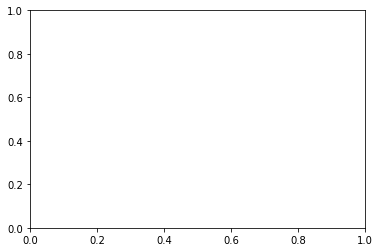

In [27]:
sns.boxplot(y = cf_train['Area_Type'])